<a href="https://colab.research.google.com/github/SOwens-Create/BabyPython/blob/master/FAIML_Project_LearnerNotebook_FullCode_SOwens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Fundamentals of AIML: Cardio Good Fitness Data Analysis**
**Marks: 40**

## **Context**

Cardio Good Fitness is a leading manufacturer of high-quality treadmills. The company offers three main products: the TM195, the TM498, and the TM798, which is their flagship product. With the rising demand for fitness in the market and an increasing number of competitors, Cardio Good Fitness wants to gain a better understanding of its existing customer profiles in order to develop more targeted marketing and product development strategies. They believe this will allow them to meet the needs and preferences of their customers, increase customer satisfaction, and drive revenue growth.

<br>

## **Objective**

In order to gain insights into its customer profiles, Cardio Good Fitness has collected demographic and product usage information for each of its customers. The dataset includes variables such as age, gender, income, and miles run on the treadmill for each of the three products.

Suppose you are hired as a Data Scientist in this company and the Data Science team has shared the data with you. The requirement is to analyze the data and identify patterns in product usage and the key characteristics of customers by conducting exploratory data analysis (EDA) to come up with customer profiles.

The goal is to answer key questions such as:

* What are the key characteristics of customers who purchase each product?
* How does product usage vary by each group?

<br>

## **Data Description**

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-


* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. number of times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

### Let us start by importing the required libraries - 

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/CardioGoodFitness.csv')

In [5]:
# copying data to another variable to avoid any changes to original data
cardio = df.copy()

In [ ]:
# returns the first 5 rows
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the product purchased by a customer. The categories of interest include the product purchased, the age of the person, their gender, education level, marital status, usage level, fitness level, income, and the miles they will put on the machine. Using head gives us the first five rows of data. 

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
#Shape describes the dataset as having 9 columns and 180 rows
cardio.shape[0]

180

In [ ]:
cardio.shape[1]

9

#### Observations:
The dataset has 9 columns and 180 rows. 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
#Using the info function to describe the different datatypes in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Observations:
The dataset has 3 object variables (Product, Gender, Marital Status) and 6 int64 numerical variables. 

### **Question 3:** Write a code to convert the data type of the object type variables to the 'categorical' type to reduce memory usage. [0.5 mark]


In [ ]:
# Using .astype to change the data type to categorical
cardio['Product']=cardio['Product'].astype('category')
cardio['Gender']=cardio['Gender'].astype('category')
cardio['MaritalStatus']=cardio['MaritalStatus'].astype('category')

### **Question 4:** Are there any missing values in the data? If yes, treat them using an appropriate method. [0.5 mark]

In [ ]:
# Determine if there are missing values in the data
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Observations: 

There do not appear to be any missing results in the data. The zero output indicates a False result, meanining that there are no null values in the data category.

### **Question 5:** Check the statistical summary of the data. Which product type has had the highest number of sales? [1 marks]

In [ ]:
# Check the statistical summary of the data for the product that had the highest number of sales
print(cardio['Product'].value_counts())

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64


#### Observations: 
The TM195 had the highest number of sales in the dataset.

## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [6 marks]

In [ ]:
# Univariate Analysis
# Start with describe for any immediate observation
cardio.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<Axes: xlabel='Product', ylabel='Count'>

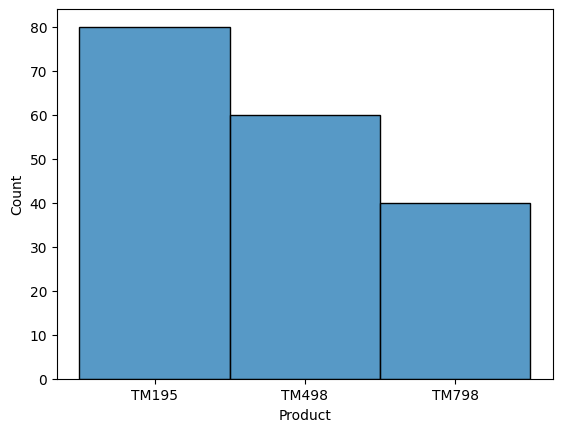

In [ ]:
# A histogram of each variable in order starting with Product
sns.histplot(data=cardio, x='Product')

<Axes: xlabel='Age', ylabel='Count'>

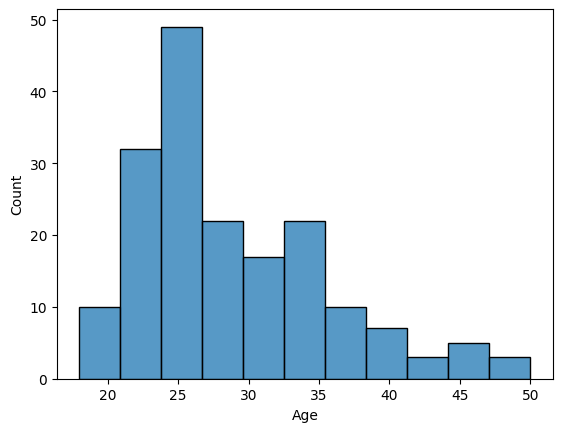

In [ ]:
#Histogram plot of Age
sns.histplot(data=cardio, x='Age')

<Axes: xlabel='Gender', ylabel='Count'>

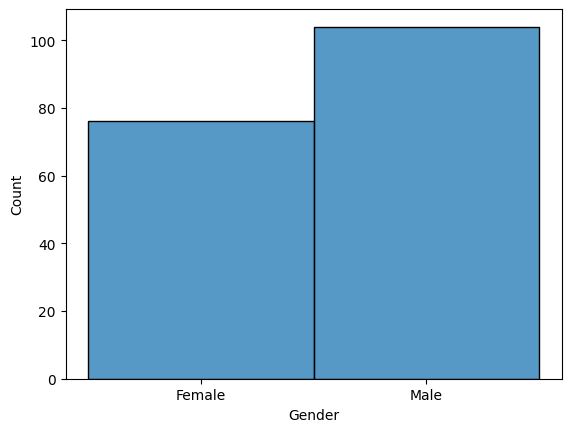

In [ ]:
#Histogram plot of Gender
sns.histplot(data=cardio, x='Gender')

<Axes: xlabel='Education', ylabel='Count'>

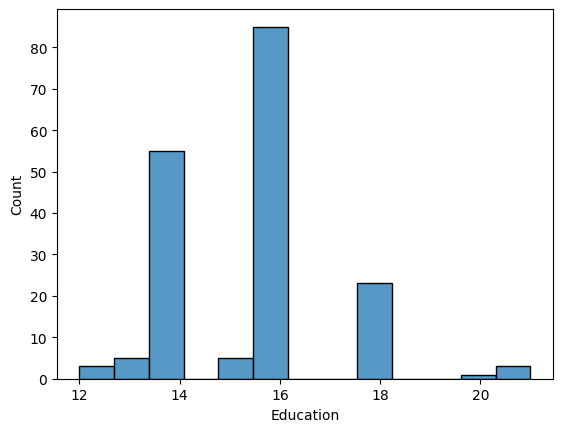

In [ ]:
#Histogram plot of Education
sns.histplot(data=cardio, x='Education')

<Axes: xlabel='MaritalStatus', ylabel='Count'>

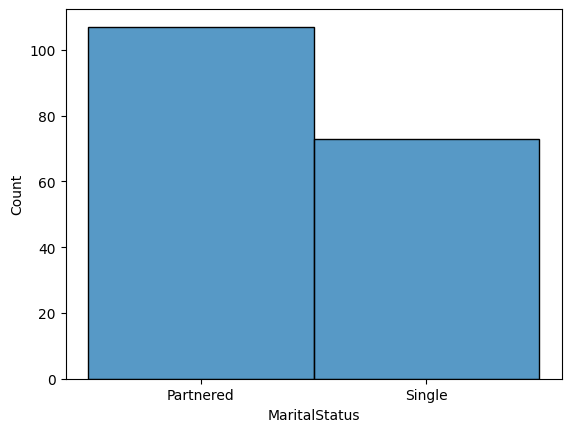

In [ ]:
#Histogram plot of Marital Status
sns.histplot(data=cardio, x='MaritalStatus')

<Axes: xlabel='Fitness', ylabel='Count'>

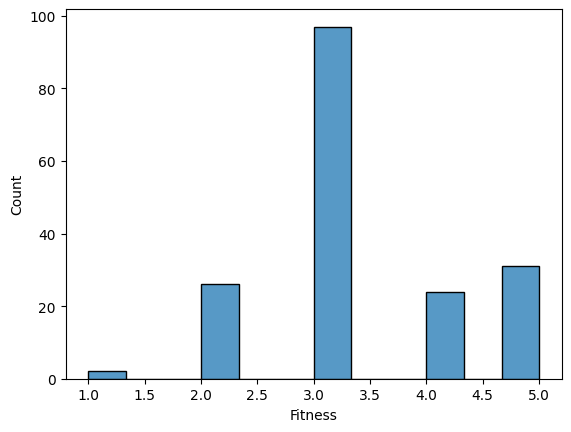

In [ ]:
#Histogram plot of Fitness
sns.histplot(data=cardio, x='Fitness')

<Axes: xlabel='Income', ylabel='Count'>

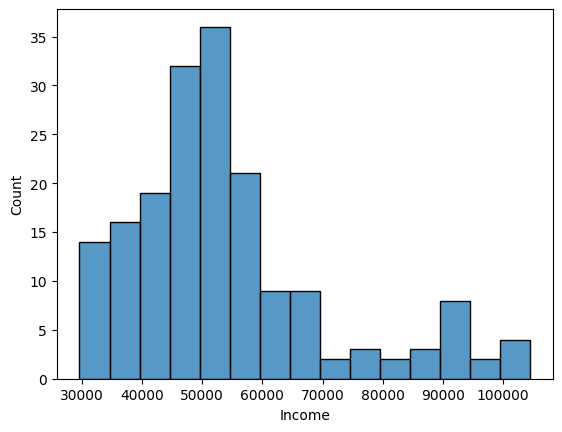

In [ ]:
#Histogram plot of Income
sns.histplot(data=cardio, x='Income')

<Axes: xlabel='Miles', ylabel='Count'>

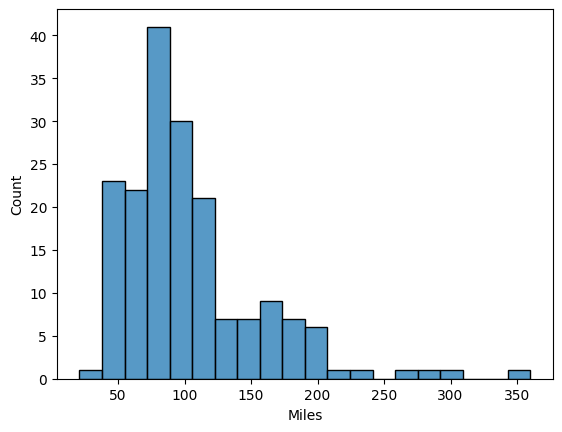

In [ ]:
#Histogram plot of Miles
sns.histplot(data=cardio, x='Miles')

<Axes: xlabel='Age'>

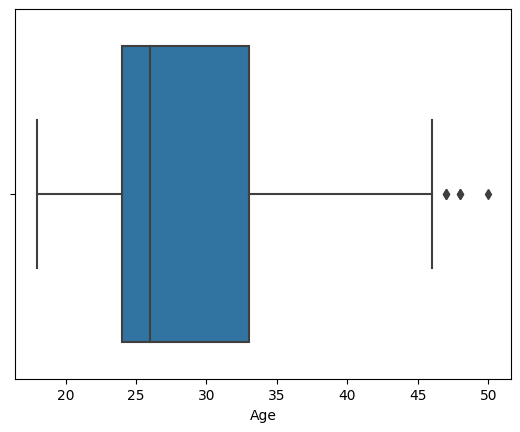

In [ ]:
#Boxplots for each numerical variable starting here.
#Boxplot of Age
sns.boxplot(data=cardio, x='Age')

<Axes: xlabel='Education'>

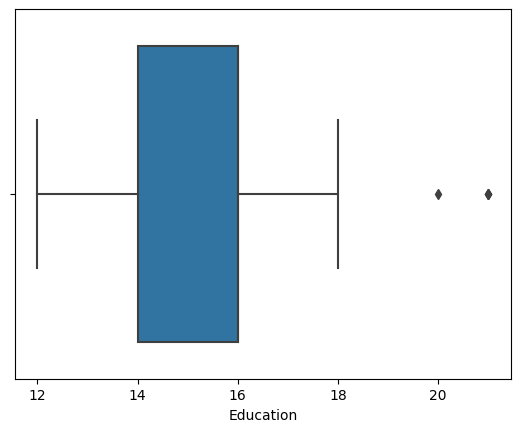

In [ ]:
#Boxplot of Education
sns.boxplot(data=cardio, x='Education')

<Axes: xlabel='Fitness'>

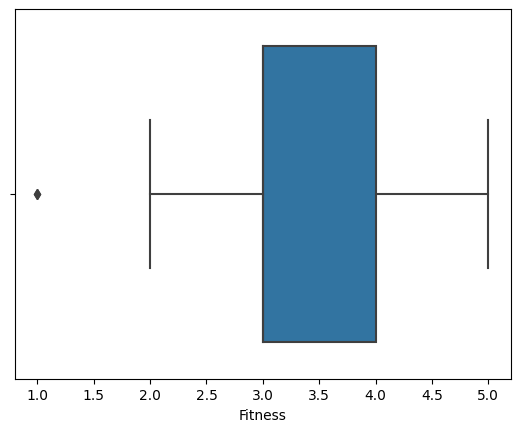

In [ ]:
#Boxplot of Fitness
sns.boxplot(data=cardio, x='Fitness')

<Axes: xlabel='Income'>

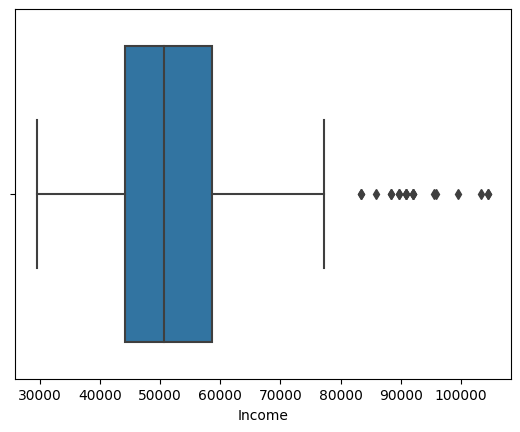

In [ ]:
#Boxplot of Income
sns.boxplot(data=cardio, x='Income')

<Axes: xlabel='Miles'>

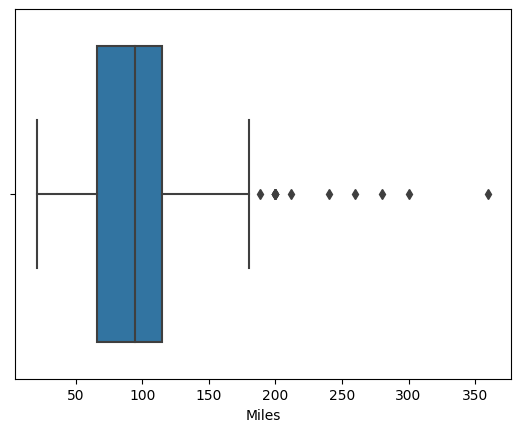

In [ ]:
#Boxplot of Miles
sns.boxplot(data=cardio, x='Miles')

<Axes: xlabel='Product', ylabel='count'>

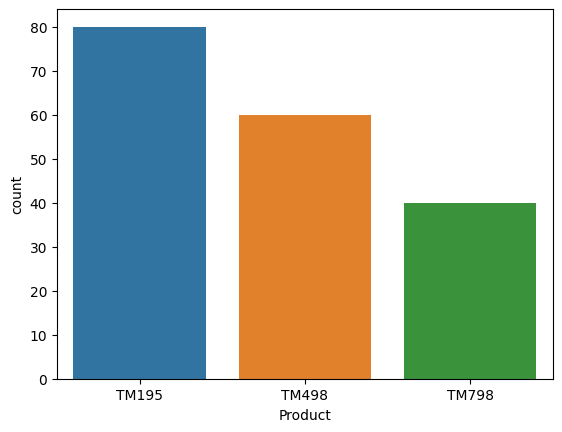

In [ ]:
#Countplots are used for categorical variables
#Couuntplot of Product
sns.countplot(data=cardio, x='Product')

<Axes: xlabel='Gender', ylabel='count'>

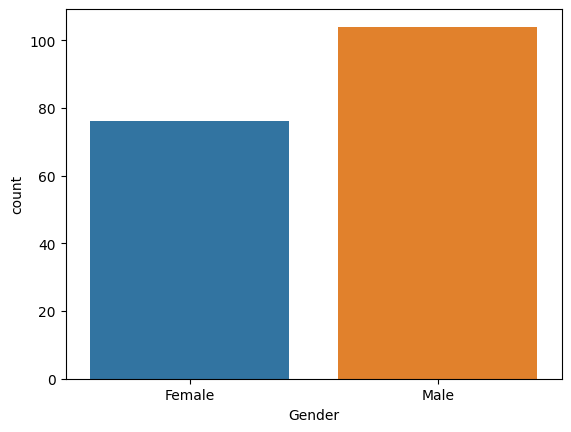

In [ ]:
#Countplot of Gender
sns.countplot(data=cardio, x='Gender')

<Axes: xlabel='MaritalStatus', ylabel='count'>

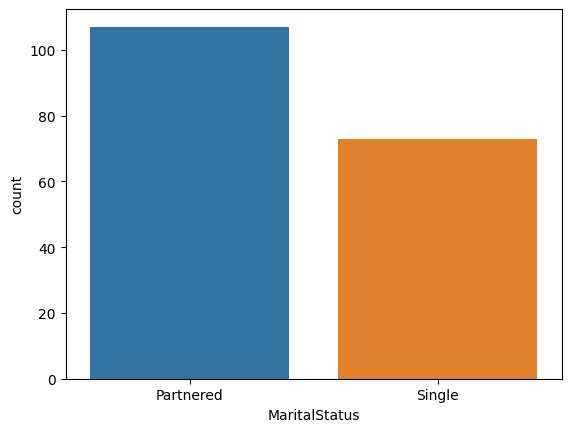

In [ ]:
#Countplot of Marital Status
sns.countplot(data=cardio, x='MaritalStatus')

#### Observations:

The univariate analysis begins with a histogram of each variable.
The first histogram is of the Product variable. The three product types are TM195, TM498, TM798. The product with the most sales is TM195 having 80, TM498 has the second highest sales at approximately 60, and TM798 has the least sales at approximately 40.

The second histogram is of the Age variable. The most frequent age of customers is 25. The maximum age is 50 and the minimum age is under 20.

There were approximately 20 more male customers than female customers as seen in the histogram of the Gender data.

The education level histogram shows that a majority of customers completed 16 years of education while the minimum completed 20.

There were approximately 40 more partnered customers than single customers.

The majority of customers have a fitness level above 3.0. The data is left skewed.

Most of the customers have an annual income between 45,000 and 55,000 while the highest earning customers have an annual income of 105,000 per year. The data is right skewed.

The majority of users will go 50-100 miles. There appears to be some outliers at 300 and 350 miles causing the data to be right skewed. 

Boxplots were used to continue the univariate analysis of the numerical variables only. The first boxplot is of the Age variable. It shows the maximum close to 25, the right skewed nature of the data, and three outliers out to age 50. That I am opting to leave in the dataset because they seem realistic. 

The education boxplot is also right skewed with just two outliers to 20 years of education.

The fitness boxplot is left skewed with the majority of the data over 3.0 and outlier down at fitness level 1.

Income is right skewed with the median right at 50,000. There are a lot of outliers leading up to the 105,000 maximum. Again, this seems like realistic income data so I'm opting not to filter it out. 

The miles data is right skewed with outlier up to that 350 miles point. Those few people might be an exception to the typical customer demographic data and can be filtered out depending on the Bivariate analysis results. I'm leaving them in the dataset for now. The median is right around 100 miles.

Countplots were used instead of boxplots for the three categorical variables. The countplots of Product, Gender, and Marital Status are exactly the same as the histogram of Product, Gender, and Marital Status with the exception of being more colorful. There isn't any additional information learned from these plots than was already provided in the histograms.

This concludes the univariate analysis of the dataset.

### **Bivariate and Multivariate Analysis**

### **Question 7:** Perform bivariate and multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [12 marks]

<ipython-input-15-684348119c65>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cardio.corr(), annot=True)


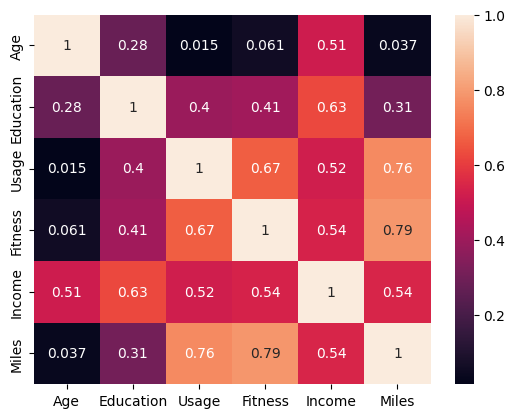

In [15]:
# Bivariate Analysis start with a heatmap of the variable correlation
sns.heatmap(cardio.corr(), annot=True)
plt.show()

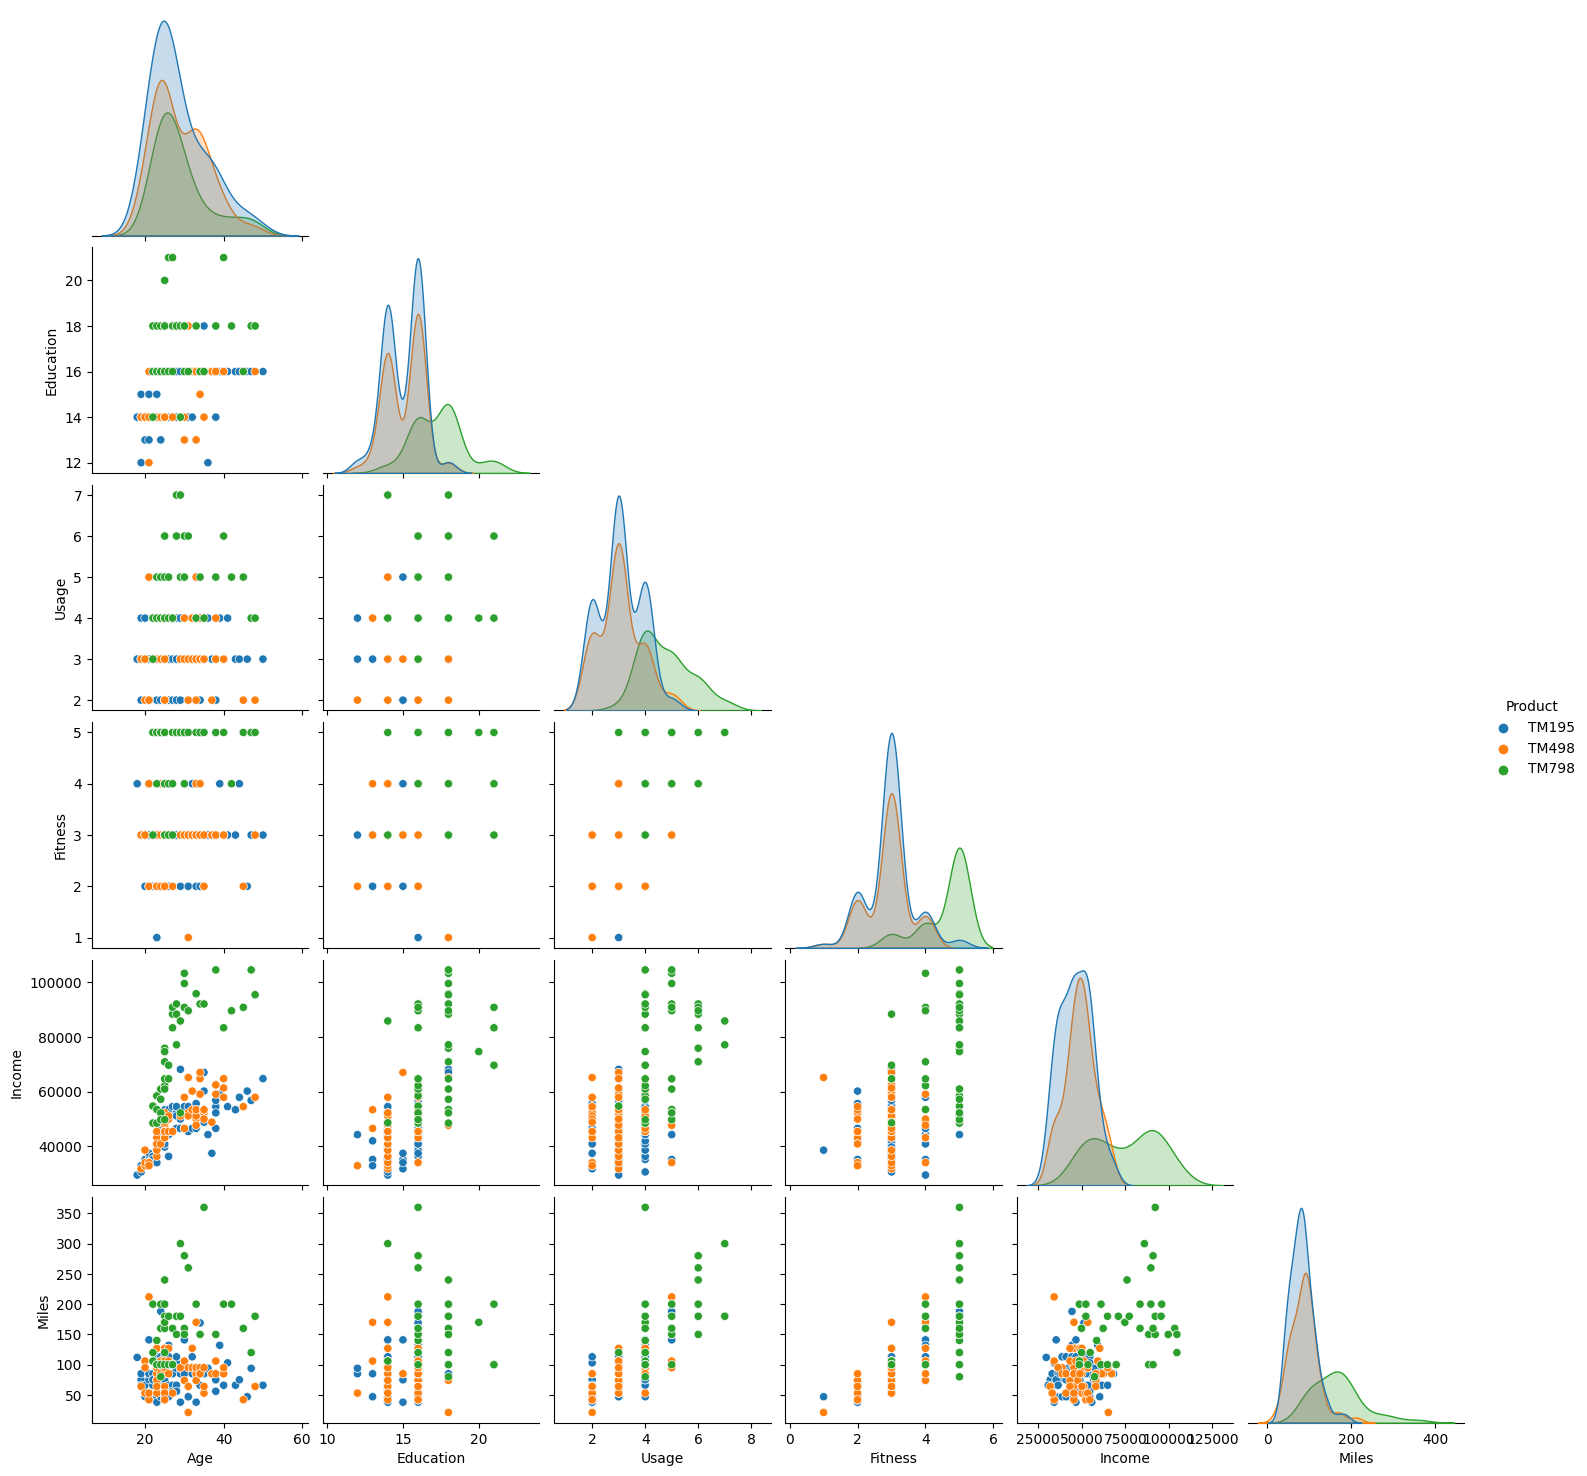

In [38]:
#A pairplot of the entire dataset was used with the product as hue to determine if there were any interesting relationships
#from a high level view. Any interesting plots will be expanded.
sns.pairplot(data=cardio , hue='Product', corner=True)

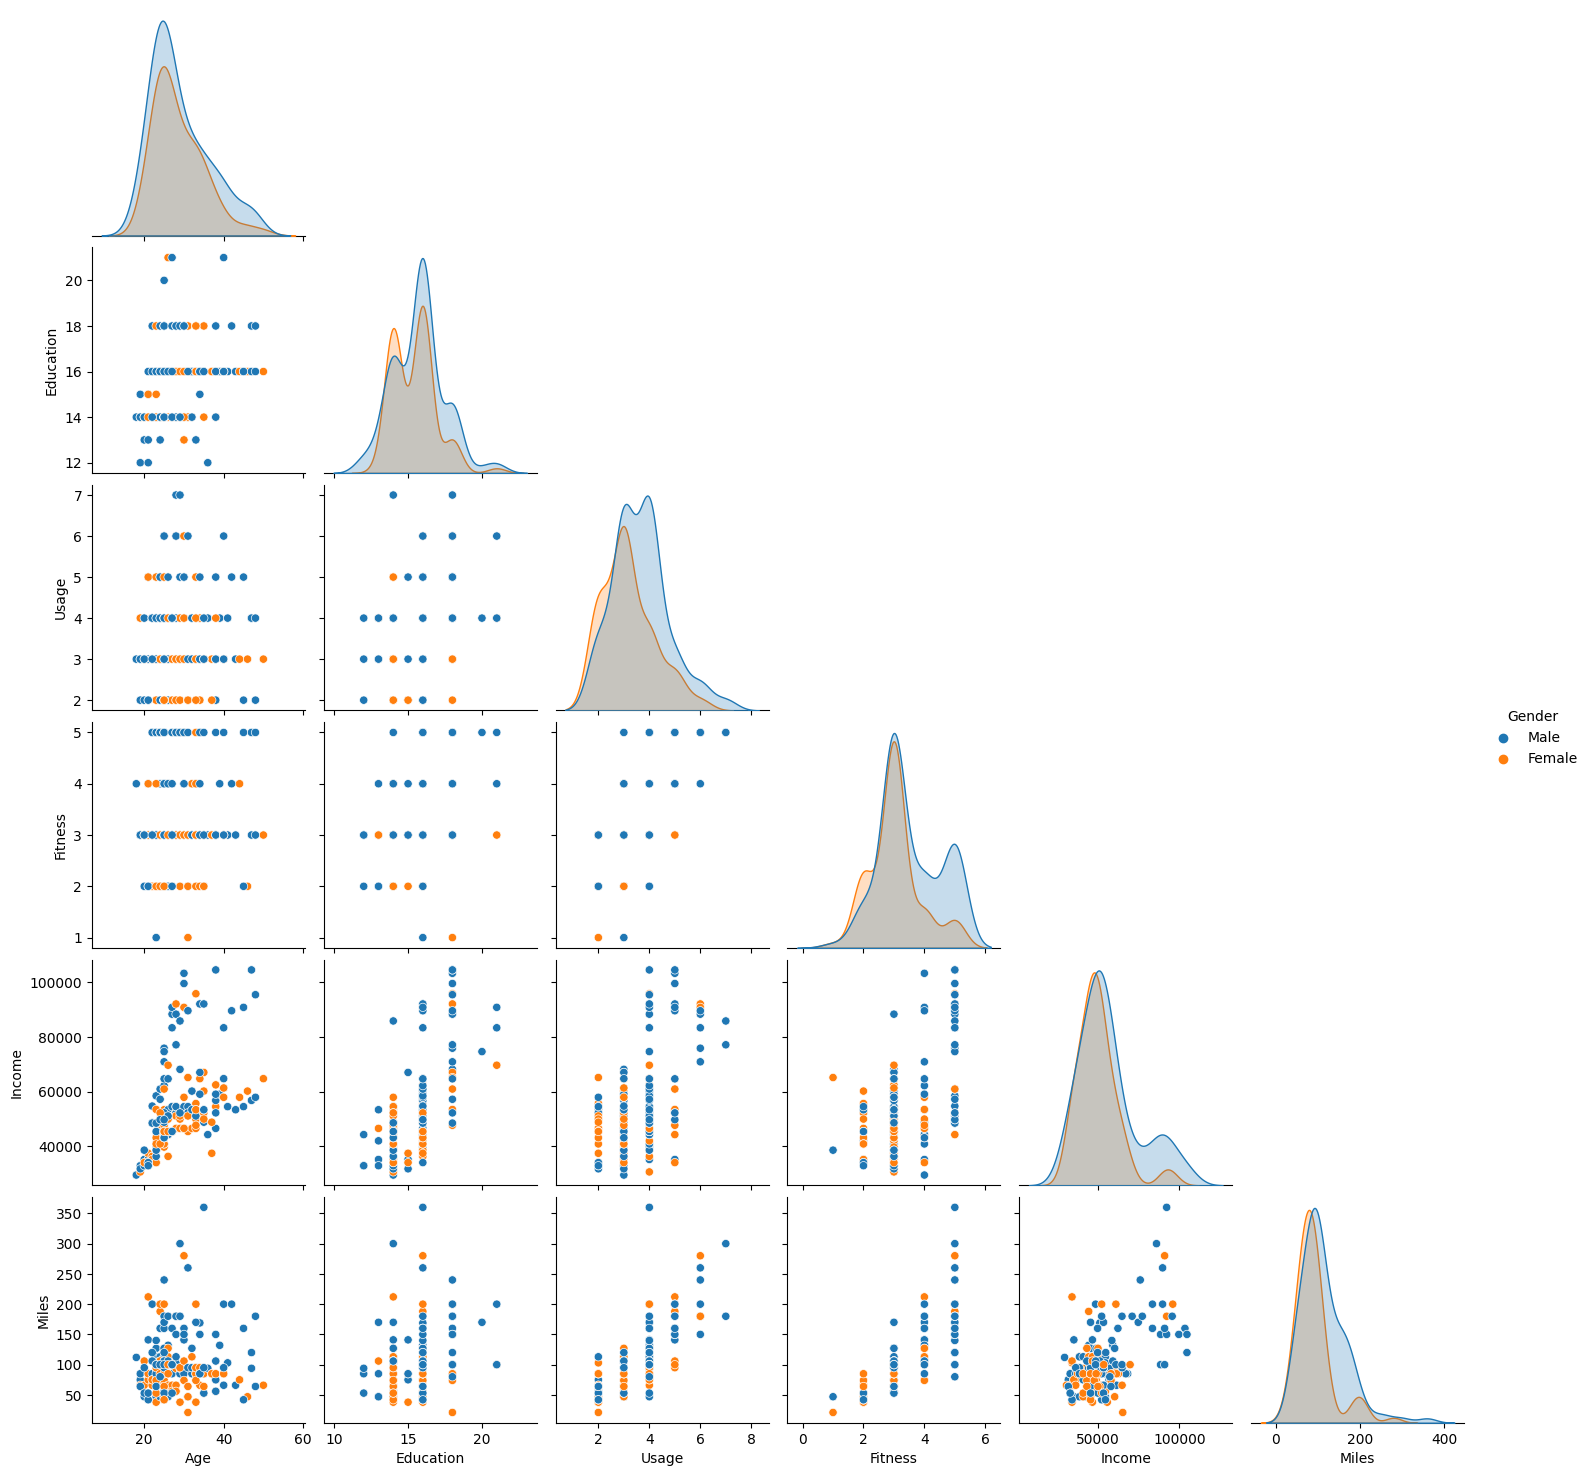

In [39]:
#Created a pairplot of Gender to see a highlevel view of the important relationships
sns.pairplot(data=cardio , hue='Gender', corner=True)

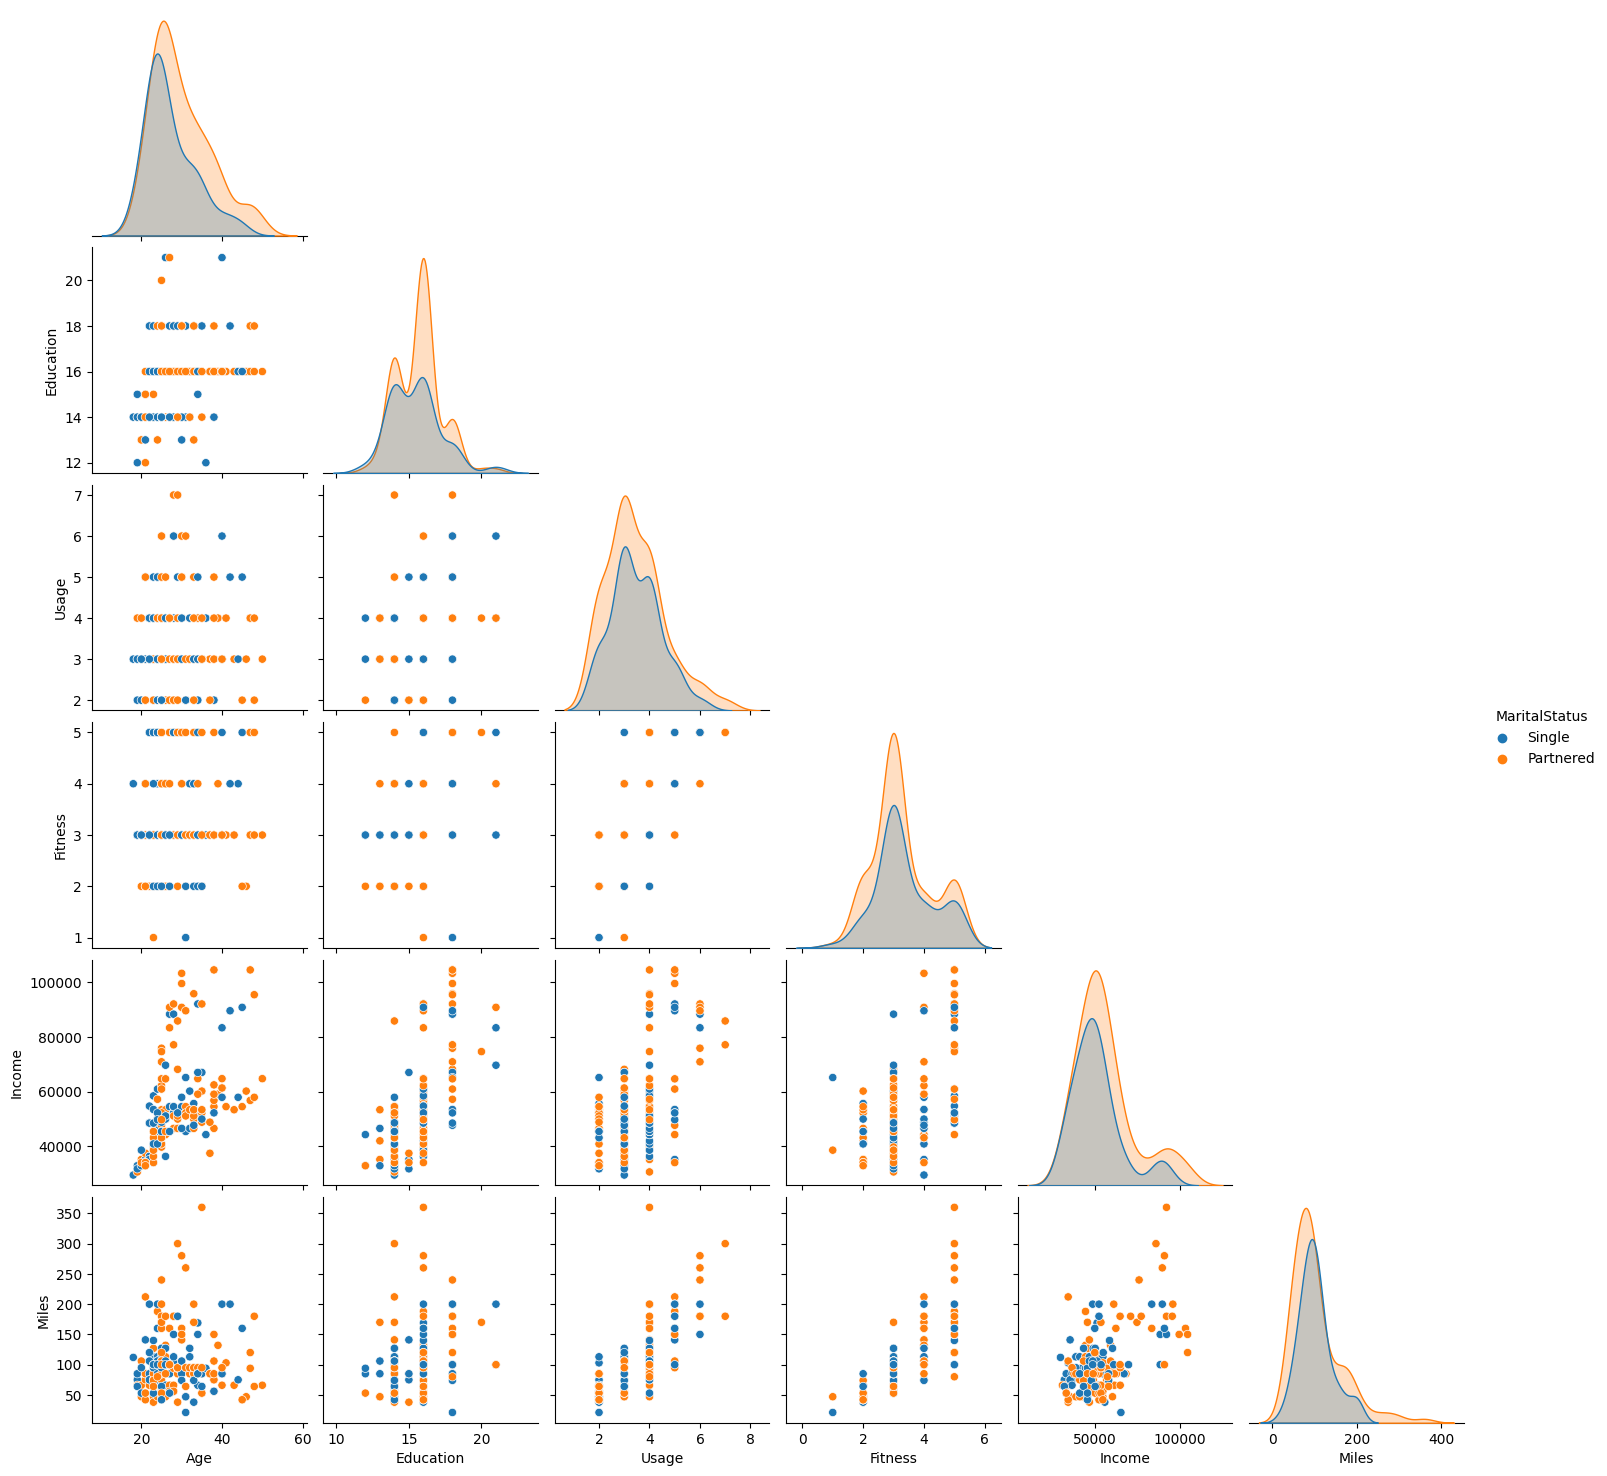

In [40]:
#Created a pairplot of Marital Status to see how it is relative to the other variables
sns.pairplot(data=cardio , hue='MaritalStatus', corner=True)

<Axes: xlabel='Product', ylabel='Count'>

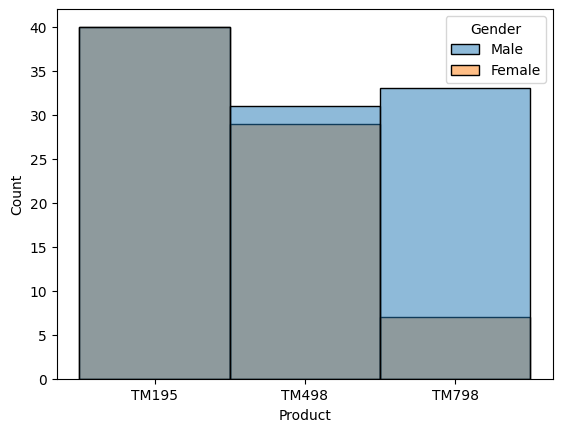

In [54]:
#Created a histogram of the gender and prodcut relationship as it showed an interesting deviation
#There are less female users of the high end product
sns.histplot(data=cardio, x='Product', hue='Gender')

<Axes: xlabel='Product', ylabel='Count'>

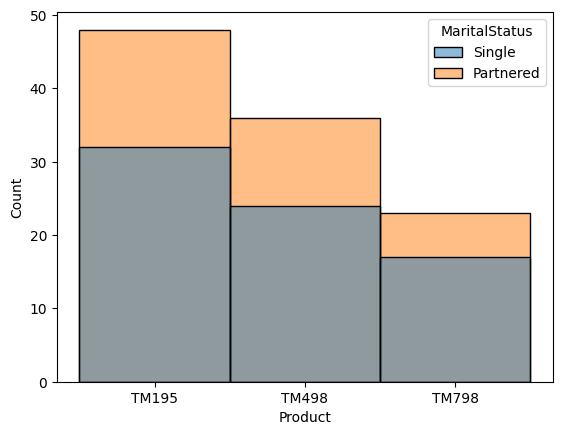

In [55]:
#Created a histogram of Product and Martial Status to verify the relationship
sns.histplot(data=cardio, x='Product', hue='MaritalStatus')

### Observations:

The heatmap of client data shows the strongest correlations exist between Fitness and Usage, Education and Income, Usage and Miles, and Fitness and Miles. All of these seem to make sense as far as customer data. 

The pair plot shows several interesting relationships. The demographic of customers that are buying the TM798 appear to be users with the highest income and education, and the highest fitness levels and usage. The users representative of the outliers on the mileage graph are buying the TM798. While fewer of these models are sold, they appear to be the product of choice for customers that are high end fitness enthusiasts regardless of age.

The TM195 and TM498 data seems to be distrubuted very similarly across all categories. The exception is that the quantity of TM195 models sold is higher. None of the data outliers are from the TM195 or TM498 products. The two categorical variables not considered in the pair plot are Gender and Marital Status. 

The pair plot was repeated with Gender as the hue and with Martial Status as the hue. It appears that the data for Gender shows that Males with higher education, higher earnings, have a higher level of fitness - likely part of the target marketing group for the TM798. Otherwise the data is similar between males and females. The Marital Status hue shows that more partnered individuals use the products and generally have higher levels of usage and fitness. Partnered individuals also have the higher education and income levels than single users. Histograms were added to explore the relationship between Gender and Product as well as Marital Status and Product. It appears that 25 more males than females purchased the higher end product. In the next histogram, partnered customers purchased more of the TM195 and TM498 models than single customers.



### **Question 8:** Group the data for each product to build customer profiles and summarize the key characteristics of the customers based on the statistical summary.  [3 marks]

<Axes: xlabel='Income', ylabel='Product'>

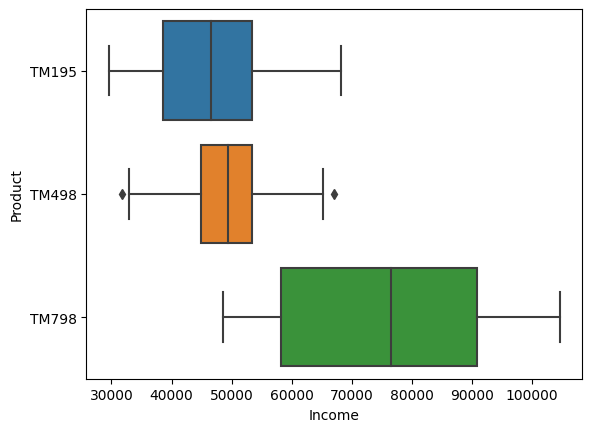

In [57]:
# Boxplot of the dataset income by product further illustrating the difference in the TM798
sns.boxplot(data=cardio, x='Income', y='Product')

<Axes: xlabel='Usage', ylabel='Product'>

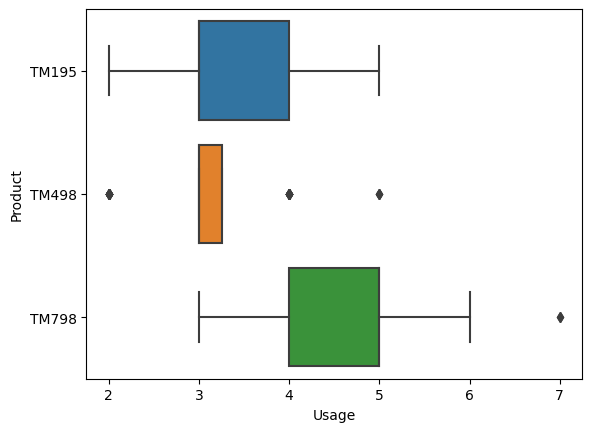

In [58]:
#Boxplot of the Usage by Product and we can see the condensed usage of TM498
sns.boxplot(data=cardio, x='Usage', y='Product')

<Axes: xlabel='Miles', ylabel='Product'>

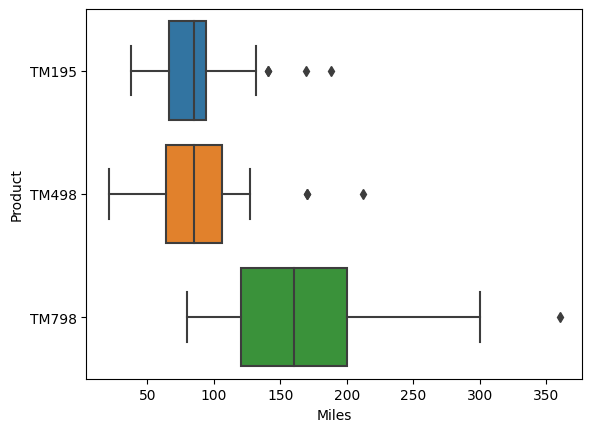

In [60]:
#Boxplot of Miles by Product again we see the difference in TM798
sns.boxplot(data=cardio, x='Miles', y='Product')

<Axes: xlabel='Age', ylabel='Product'>

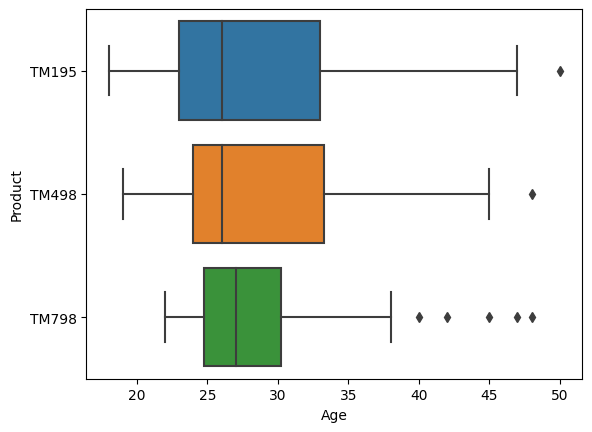

In [61]:
#Boxplot of the Age grouping showing the outliers on the TM798
#Indicating that the age grouping is more condensed for the TM798
sns.boxplot(data=cardio, x='Age', y='Product')

<Axes: xlabel='Fitness', ylabel='Product'>

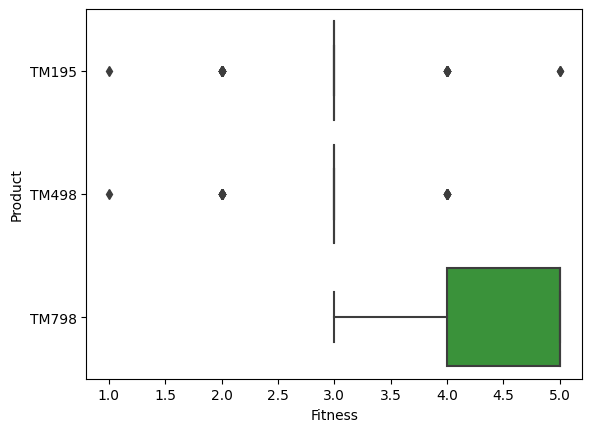

In [62]:
#Boxplot of the Fitness level by product with TM798 again showing a skew
sns.boxplot(data=cardio, x='Fitness', y='Product')

<Axes: xlabel='Education', ylabel='Product'>

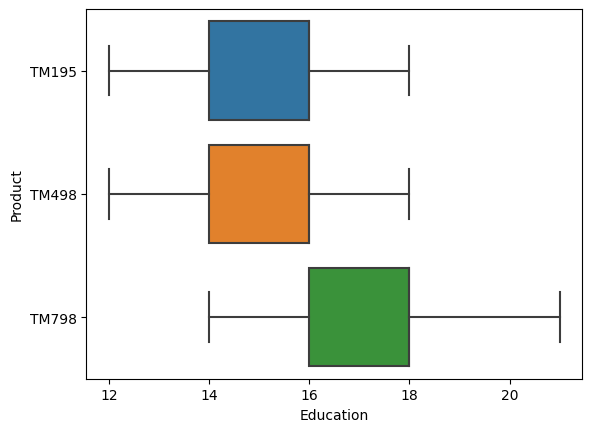

In [63]:
#Boxplot of education level by product, coincides with income.
sns.boxplot(data=cardio, x='Education', y='Product')

<Axes: xlabel='Income', ylabel='Miles'>

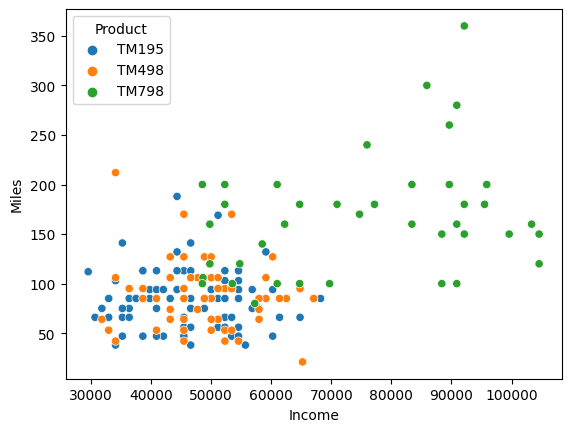

In [68]:
#Scatter plot of Income vs Miles using product as the hue to again demonstrate that 
#The TM798 is the product of choice for higher income users that are more concerned with fitness
sns.scatterplot(data=cardio, x='Income', y='Miles', hue='Product')

<Axes: xlabel='Income', ylabel='Age'>

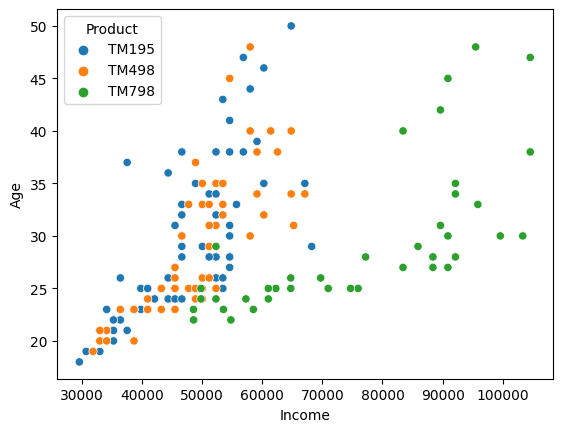

In [7]:
#Scatterplot showing the relationship of Income to Age with Product as the hue
#Again we see the income preference to the TM798 product
sns.scatterplot(data=cardio, x='Income', y='Age', hue='Product')

In [77]:
#Executing group by to see if there are any additional relationships when grouping the data by product
grouped=cardio.groupby(['Product'])
print(cardio)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     TM195   18    Male         14        Single      3        4   29562   
1     TM195   19    Male         15        Single      2        3   31836   
2     TM195   19  Female         14     Partnered      4        3   30699   
3     TM195   19    Male         12        Single      3        3   32973   
4     TM195   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   TM798   40    Male         21        Single      6        5   83416   
176   TM798   42    Male         18        Single      5        4   89641   
177   TM798   45    Male         16        Single      5        5   90886   
178   TM798   47    Male         18     Partnered      4        5  104581   
179   TM798   48    Male         18     Partnered      4        5   95508   

     Miles  
0      112  
1       75  
2       66  
3       85  
4       47

<Axes: xlabel='Age', ylabel='Product'>

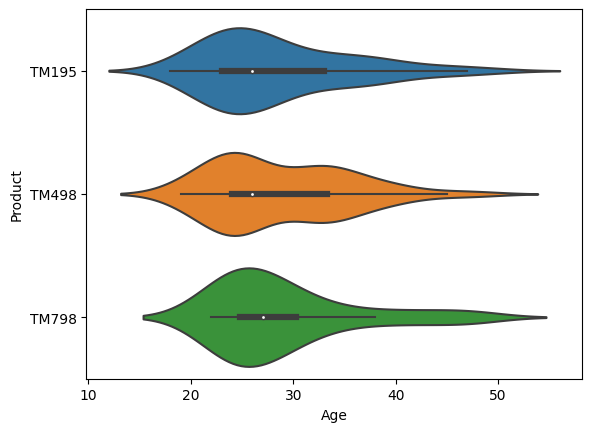

In [80]:
#Violinplot of Aga and Product
sns.violinplot(data=cardio, x='Age', y='Product')

<Axes: xlabel='Fitness', ylabel='Product'>

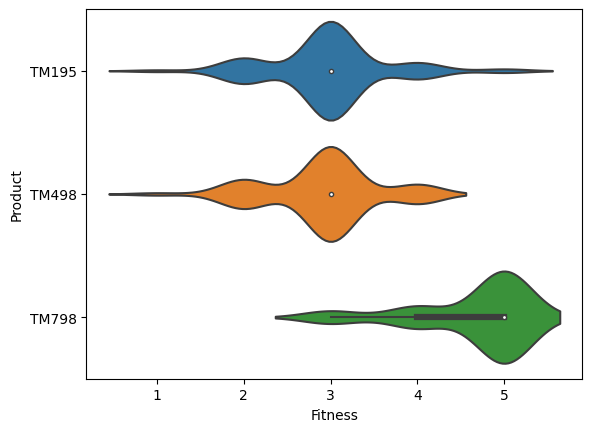

In [81]:
#Violinplot of Fitness and Product
#Showing that fitness enthusiast preference to the TM798
sns.violinplot(data=cardio, x='Fitness', y='Product')

<Axes: xlabel='Usage', ylabel='Product'>

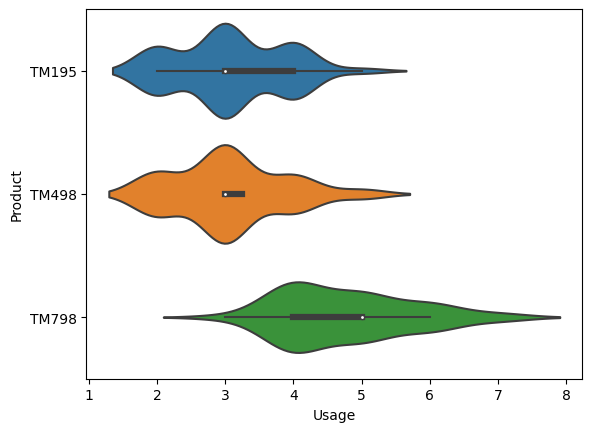

In [82]:
#Violinplot of Usage and Product
#Higher usage of the TM798
sns.violinplot(data=cardio, x='Usage', y='Product')

**Question 8:**

Summary of the customer data: The users with higher income have a higher education. These users have the highest usage rates, highest miles, and highest fitness ratings. The majority of them are male. They prefer the TM798.
The users with lower incomes have lower usage and mileage rates are equally male and female. The relationship between partnered and single doesn't change much from model to model. The two models preferred by this group are the TM195 and TM498. Most of the users are close to 25 in age. 

### **Question 9:** Summarize the key characteristics of each product based on the analysis performed. What recommendations would you like to share to help improve the business? [6 marks]

TM195: This is the model bought most frequently by customers with the lowest incomes. There are not many differences in the data between this model and the TM498 aside from usage. It shows the same spread between single and partnered. The same number of men and women purchased this model. 

TM498: The primary distinguishing factor between this model and the TM195 is the usage category. The TM498 does not show as much variation in the usage according to the boxplot. The data is condensed around a value of 3. Both the TM195 and the TM498 are bought by customers with lower incomes. Not much difference in gender and the same spread between single and partnered is seen in this model as for the TM195.

TM798: This model seems to appeal to a different demographic of client. The users are primarly male, putting on a higher number of miles, and maintaining a higher level of fitness and usage than the customers buying the other two models. They are higher earning and more educated.

To help the business, market each model to the appropriate demographic and also try to capture the missing pieces of each market. Advertise the TM798 as a machine for a fitness enthusiast. Investigate further to understand why there are less female users and how to capture that group. Focus on cutting production costs and meeting the higher demand of the two lower end models. Review the operational differences between the TM195 and TM498 - it seems that one of the models might be able to be discontinued. They might be serving the same market need. Also investigate the higher age group and identify ways to appeal to that market also. 

#### **Conclusion:**

*   The TM798 is selling less than the other two models.
*   The customer for the TM798 is primarily a high earning male with higher mileage and higher fitness level.
*   The TM195 and TM498 appeal to users with lower income and lower fitness levels. The miles are less. There is not much difference in the data for the two models.
*   The outliers in the dataset are males running high miles earning high incomes and having high education levels. 
*   Customers who purchase the TM798 are generally more fit.
*   The age distribution appears similar for all three products. 
*   Recommendations for changes in marketing techniques are listed below.





#### **Recommendations:**

*  Explore the possibility of discontinuing either the TM195 or TM498 to reduce production costs if they are serving the same market demographic and the difference in price is not significant enough to impact overall product sales.

*  Market the TM798 to male fitness enthusiasts with high education and high income. Consider competitors in this category and pricing to increase sales. 

*  Explore the reason that sales are not being brought in by females on the TM798 and examine if there is a need that is not met or a different preference by gender. 

*   Any additional markets to target. The current product lines appeal to a younger age range. Examine the possibility of marketing to a higher age range. Or a new product specifically for that market.

*   Examine competitor data on the products to look for similar trends in usage. 







